In [13]:
import numpy as np
import sys
sys.path.append('/mnt/Vol20tb1/user_workspaces/mmpatil/MEA_Analysis/IPNAnalysis')  # Add parent directory to path for module imports
import helper_functions
import json

In [14]:
RESULT_DIR = "/mnt/Vol20tb1/user_workspaces/shruti/MEA_Analysis/MEA_Analysis_V2/MEA_Analysis/AnalyzedData/JGA_CSB3_010825_VD/250122/M08018/Network/000021/well003/"

spiketimes = np.load(f"{RESULT_DIR}/spike_times.npy", allow_pickle=True).item()

with open(f"{RESULT_DIR}/network_results.json", "r") as f:
    network_data = json.load(f)



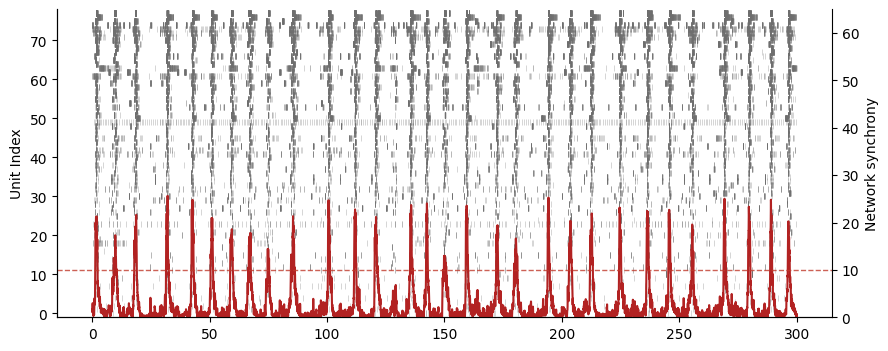

In [15]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 4))
ax_raster = ax
ax_network = ax.twinx()
#sort spiketimes by firing rate (len /time)
#maximum time in spiketimes.values() is 300
spike_counts = {unit: len(times) for unit, times in spiketimes.items()}
sorted_units = sorted(spike_counts, key=spike_counts.get)
#sorted_channels = sorted(spiketimes.keys(), key=lambda ch: len(spiketimes[ch]))
# Raster (left axis)
helper_functions.plot_clean_raster(
    ax_raster,
    spiketimes,
    sorted_units=sorted_units,
    color='#6E6E6E',
    markersize=4,
    markeredgewidth=0.5,
    alpha=0.4
)

# Network (right axis)
helper_functions.plot_clean_network(
    ax_network,
   
    network_data["plot_data"]["t"],
    network_data["plot_data"]["signal"],
    threshold=network_data["plot_data"]["threshold"],
    color="#B22222"

)
ax.spines["right"].set_visible(True)
#ax.set_xlim(0, 60)
ax_network.set_ylim(0,65)

fig.savefig(f"{RESULT_DIR}/M08018_well003_Healthy_mergedraster", dpi=300, bbox_inches='tight', format='svg')


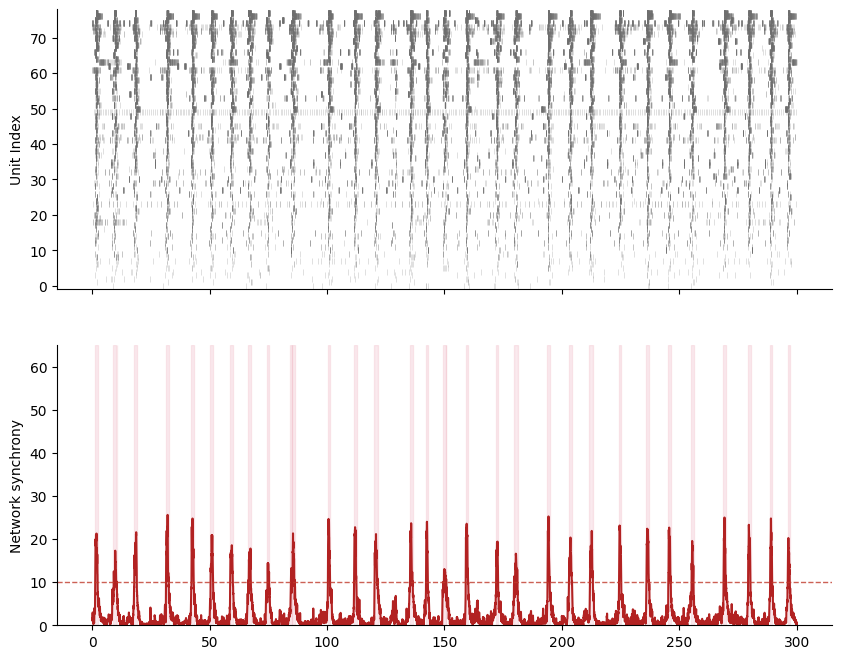

In [17]:
#SEPARATE PLOT FOR PUBLICATION
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
ax_raster , ax_network = axs
#maximum time in spiketimes.values() is 300
spike_counts = {unit: len(times) for unit, times in spiketimes.items()}
sorted_units = sorted(spike_counts, key=spike_counts.get)
helper_functions.plot_clean_raster(
            ax_raster,
            spiketimes,
            sorted_units=sorted_units,
    color='#6E6E6E',
    markersize=4,
    markeredgewidth=0.5,
    alpha=0.3
    )
helper_functions.plot_clean_network(    ax_network,
   
    network_data["plot_data"]["t"],
    network_data["plot_data"]["signal"],
    threshold=network_data["plot_data"]["threshold"],
    color="#B22222")

nb_events = network_data["network_bursts"]["events"]
burst_intervals = [
    (ev["start"], ev["end"]) for ev in nb_events
]
for start, end in burst_intervals:
    ax_network.axvspan(start, end, color="#E78EA2", alpha=0.18)

#ax_raster.set_xlim(0, 60)
#ax_network.set_xlim(0,60)
ax_network.set_ylim(0,65)


fig.savefig(f"{RESULT_DIR}/M08018_well003_Healthy_seperateraster_network", dpi=300, bbox_inches='tight', format='svg')

In [18]:
RESULT_DIR = "/mnt/Vol20tb1/user_workspaces/shruti/MEA_Analysis/MEA_Analysis_V2/MEA_Analysis/AnalyzedData/JGA_CSB3_010825_VD/250122/M08020/Network/000024/well005/"

spiketimes = np.load(f"{RESULT_DIR}/spike_times.npy", allow_pickle=True).item()

with open(f"{RESULT_DIR}/network_results.json", "r") as f:
    network_data = json.load(f)



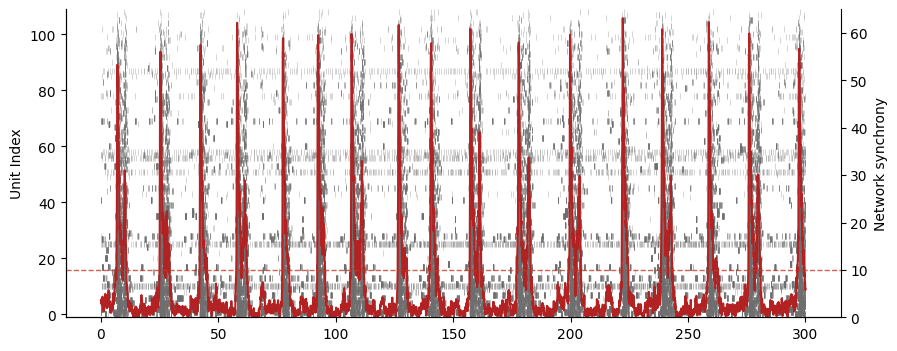

In [20]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 4))
ax_raster = ax
ax_network = ax.twinx()
#sort spiketimes by firing rate (len /time)
#maximum time in spiketimes.values() is 300
timespan = max([(spiketimes[ch][-1]) for ch in spiketimes.keys()])
sorted_channels = sorted(spiketimes.keys(), key=lambda ch: len(spiketimes[ch])/timespan,reverse=True)
#sorted_channels = sorted(spiketimes.keys(), key=lambda ch: len(spiketimes[ch]))
# Raster (left axis)
helper_functions.plot_clean_raster(
    ax_raster,
    spiketimes,
    sorted_units=sorted_channels,
    color='#6E6E6E',
    markersize=4,
    markeredgewidth=0.5,
    alpha=0.4
)

# Network (right axis)
helper_functions.plot_clean_network(
    ax_network,
   
    network_data["plot_data"]["t"],
    network_data["plot_data"]["signal"],
    threshold=network_data["plot_data"]["threshold"],
    color="#B22222"

)
ax.spines["right"].set_visible(True)
#ax.set_xlim(0, 60)
ax_network.set_ylim(0,65)

fig.savefig(f"{RESULT_DIR}/M08020_E198K_well005_mergedraster", dpi=300, bbox_inches='tight', format='svg')


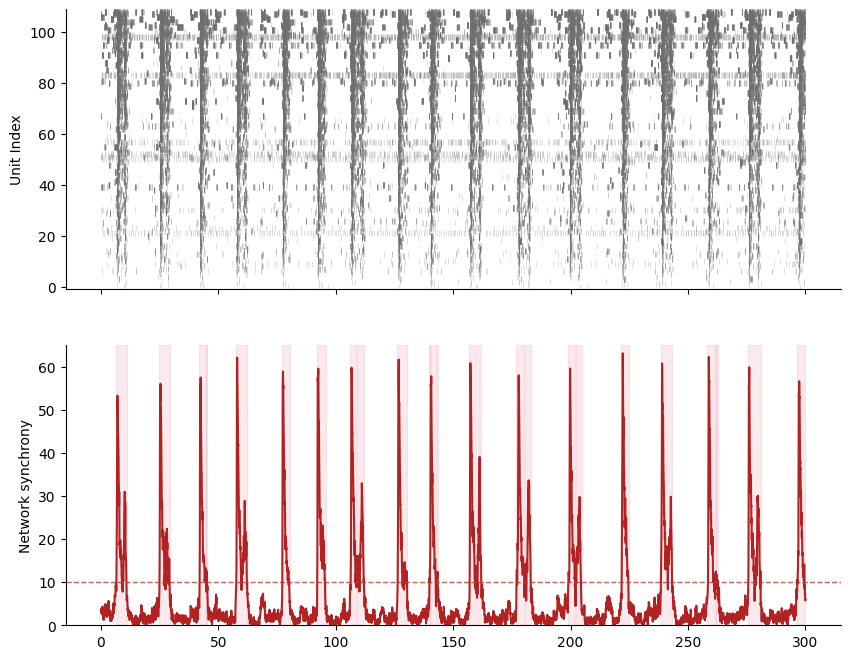

In [21]:
#SEPARATE PLOT FOR PUBLICATION
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
ax_raster , ax_network = axs
#maximum time in spiketimes.values() is 300
spike_counts = {unit: len(times) for unit, times in spiketimes.items()}
sorted_units = sorted(spike_counts, key=spike_counts.get)
helper_functions.plot_clean_raster(
            ax_raster,
            spiketimes,
            sorted_units=sorted_units,
    color='#6E6E6E',
    markersize=4,
    markeredgewidth=0.5,
    alpha=0.3
    )
helper_functions.plot_clean_network(    ax_network,
   
    network_data["plot_data"]["t"],
    network_data["plot_data"]["signal"],
    threshold=network_data["plot_data"]["threshold"],
    color="#B22222")

nb_events = network_data["network_bursts"]["events"]
burst_intervals = [
    (ev["start"], ev["end"]) for ev in nb_events
]
for start, end in burst_intervals:
    ax_network.axvspan(start, end, color="#E78EA2", alpha=0.18)
ax_network.set_ylim(0,65)
#ax_raster.set_xlim(0, 60)
#ax_network.set_xlim(0,60)

fig.savefig(f"{RESULT_DIR}//M08020_E198K_well005_seperateraster_network", dpi=300, bbox_inches='tight', format='svg')

In [22]:
RESULT_DIR = "/mnt/Vol20tb1/user_workspaces/shruti/MEA_Analysis/MEA_Analysis_V2/MEA_Analysis/AnalyzedData/JGA_CSB3_010825_VD/250122/M05506/Network/000028/well003/"

spiketimes = np.load(f"{RESULT_DIR}/spike_times.npy", allow_pickle=True).item()

with open(f"{RESULT_DIR}/network_results.json", "r") as f:
    network_data = json.load(f)



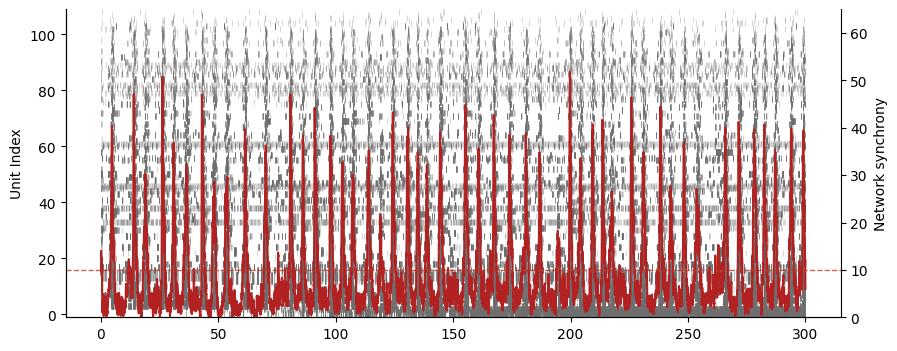

In [24]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 4))
ax_raster = ax
ax_network = ax.twinx()
#sort spiketimes by firing rate (len /time)
#maximum time in spiketimes.values() is 300
timespan = max([(spiketimes[ch][-1]) for ch in spiketimes.keys()])
sorted_channels = sorted(spiketimes.keys(), key=lambda ch: len(spiketimes[ch])/timespan,reverse=True)
#sorted_channels = sorted(spiketimes.keys(), key=lambda ch: len(spiketimes[ch]))
# Raster (left axis)
helper_functions.plot_clean_raster(
    ax_raster,
    spiketimes,
    sorted_units=sorted_channels,
    color='#6E6E6E',
    markersize=4,
    markeredgewidth=0.5,
    alpha=0.4
)

# Network (right axis)
helper_functions.plot_clean_network(
    ax_network,
   
    network_data["plot_data"]["t"],
    network_data["plot_data"]["signal"],
    threshold=network_data["plot_data"]["threshold"],
    color="#B22222"

)
ax.spines["right"].set_visible(True)
#ax.set_xlim(0, 60)
ax_network.set_ylim(0,65)

fig.savefig(f"{RESULT_DIR}/M05506_well003_E200k_mergedraster", dpi=300, bbox_inches='tight', format='svg')


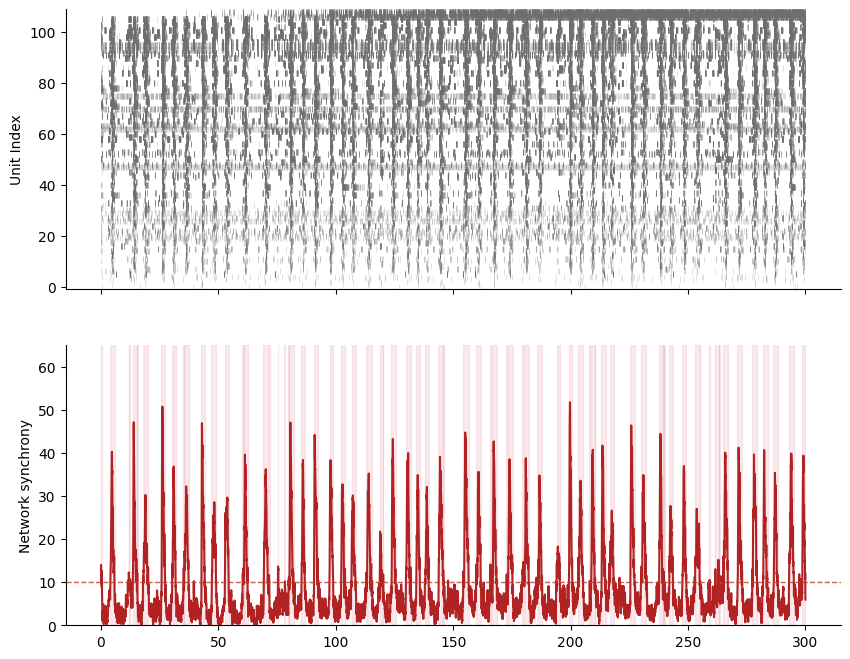

In [25]:
#SEPARATE PLOT FOR PUBLICATION
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
ax_raster , ax_network = axs
#maximum time in spiketimes.values() is 300
spike_counts = {unit: len(times) for unit, times in spiketimes.items()}
sorted_units = sorted(spike_counts, key=spike_counts.get)
helper_functions.plot_clean_raster(
            ax_raster,
            spiketimes,
            sorted_units=sorted_units,
    color='#6E6E6E',
    markersize=4,
    markeredgewidth=0.5,
    alpha=0.3
    )
helper_functions.plot_clean_network(    ax_network,
   
    network_data["plot_data"]["t"],
    network_data["plot_data"]["signal"],
    threshold=network_data["plot_data"]["threshold"],
    color="#B22222")

nb_events = network_data["network_bursts"]["events"]
burst_intervals = [
    (ev["start"], ev["end"]) for ev in nb_events
]
for start, end in burst_intervals:
    ax_network.axvspan(start, end, color="#E78EA2", alpha=0.18)

ax_network.set_ylim(0,65)
#ax_raster.set_xlim(0, 60)
#ax_network.set_xlim(0,60)

fig.savefig(f"{RESULT_DIR}/M05506_well003_E200k_seperateraster_network", dpi=300, bbox_inches='tight', format='svg')